<a href="https://colab.research.google.com/github/mmtaha/BOOTCAMP-EVERIS/blob/main/C%C3%B3pia_de_C%C3%B3pia_de_Regress%C3%A3o_Linear_(SENAC2023).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exemplo de uma regressão linear simples em Python

Primeiro vamos importar as bibliotecas Necessárias

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Lendo e processando o dataset

Vamos utilizar o dataset com dados sobre valores de imóveis disponível no [kaggle](https://www.kaggle.com/quantbruce/real-estate-price-prediction). Para simplificação, esse dataset está disponível no [link](https://www.dropbox.com/s/21kk53sgenipmob/Real%20estate.csv?dl=0).

In [ ]:
!wget -c https://www.dropbox.com/s/21kk53sgenipmob/Real%20estate.csv?dl=0 -O real_estate.csv

--2023-11-13 22:06:04--  https://www.dropbox.com/s/21kk53sgenipmob/Real%20estate.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/21kk53sgenipmob/Real%20estate.csv [following]
--2023-11-13 22:06:04--  https://www.dropbox.com/s/raw/21kk53sgenipmob/Real%20estate.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc32e5f9db2f44d205a262421ad4.dl.dropboxusercontent.com/cd/0/inline/CHfuseEGMD01SgvB-ViTPnrDxmnHdph6qc38r6EpiDqf8nP6QxqQHxXDbmLiKU9hKr0GH9UibpcKG6zXNriH-cbXGx8izPUFJ8OEq5dln1RLjH7kUWOP9T5V4bQ14LHe3bE/file# [following]
--2023-11-13 22:06:04--  https://uc32e5f9db2f44d205a262421ad4.dl.dropboxusercontent.com/cd/0/inline/CHfuseEGMD01SgvB-ViTPnrDxmnHdph6qc38r6EpiDqf8nP6QxqQHxXDbmLiKU9hKr0GH9UibpcKG6zXNriH-cbXGx8izPUFJ8OEq5d

Vamos examinar o que temos nas 10 primeiras linhas do dataset utilizando o comando `head` do bash

In [ ]:
!head -10 real_estate.csv

No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
1,2012.917,32,84.87882,10,24.98298,121.54024,37.9
2,2012.917,19.5,306.5947,9,24.98034,121.53951,42.2
3,2013.583,13.3,561.9845,5,24.98746,121.54391,47.3
4,2013.500,13.3,561.9845,5,24.98746,121.54391,54.8
5,2012.833,5,390.5684,5,24.97937,121.54245,43.1
6,2012.667,7.1,2175.03,3,24.96305,121.51254,32.1
7,2012.667,34.5,623.4731,7,24.97933,121.53642,40.3
8,2013.417,20.3,287.6025,6,24.98042,121.54228,46.7
9,2013.500,31.7,5512.038,1,24.95095,121.48458,18.8


In [ ]:
!tail -10 real_estate.csv

405,2013.333,16.4,289.3248,5,24.98203,121.54348,41.2
406,2012.667,23,130.9945,6,24.95663,121.53765,37.2
407,2013.167,1.9,372.1386,7,24.97293,121.54026,40.5
408,2013.000,5.2,2408.993,0,24.95505,121.55964,22.3
409,2013.417,18.5,2175.744,3,24.9633,121.51243,28.1
410,2013.000,13.7,4082.015,0,24.94155,121.50381,15.4
411,2012.667,5.6,90.45606,9,24.97433,121.5431,50
412,2013.250,18.8,390.9696,7,24.97923,121.53986,40.6
413,2013.000,8.1,104.8101,5,24.96674,121.54067,52.5
414,2013.500,6.5,90.45606,9,24.97433,121.5431,63.9


In [ ]:
! wc -l real_estate.csv

415 real_estate.csv


Agora vamos utilizar o [pandas](https://pandas.pydata.org/) para ler o nosso dataset e examinar o que temos nas primeiras linhas de daddos

In [ ]:
real_estate_data = pd.read_csv("real_estate.csv")

In [ ]:
real_estate_data.head(10)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
5,6,2012.667,7.1,2175.03000,3,24.96305,121.51254,32.1
6,7,2012.667,34.5,623.47310,7,24.97933,121.53642,40.3
7,8,2013.417,20.3,287.60250,6,24.98042,121.54228,46.7
8,9,2013.500,31.7,5512.03800,1,24.95095,121.48458,18.8
9,10,2013.417,17.9,1783.18000,3,24.96731,121.51486,22.1


Vamos visualizar a relação da variável `Y house price of unit area` com a variável `X3 distance to the nearest MRT station`

Text(0, 0.5, 'Preço')

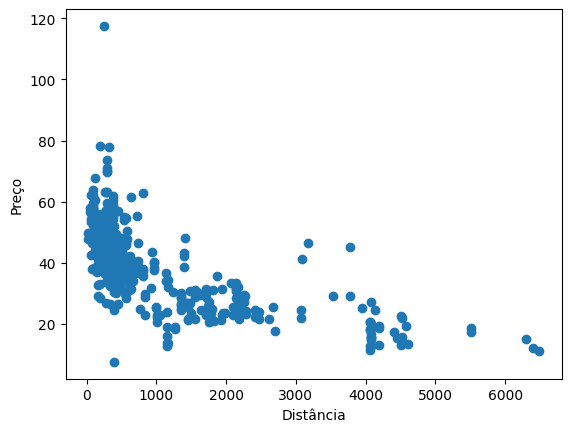

In [ ]:
plt.scatter(x=real_estate_data.iloc[:,3], y=real_estate_data.iloc[:,7])
plt.xlabel("Distância")
plt.ylabel("Preço")

## Linear regression utilizando [scikit-learn](https://scikit-learn.org/stable/)

Vamos importar o módulo `linear_model` e instanciar uma regressão linear


In [ ]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

Precisamos manipular nossos dados para utilizar o scikit-learn, uma vez que o método `fit` recebe, como entrada arrays numpy de duas dimensões. Caso se utilize mais do que duas variáveis preditoras, deve-se remover o trecho `.reshape(-1,1)`

[Referência]( https://stackoverflow.com/questions/61367841/why-does-the-fit-method-in-sklearns-linearregression-only-accept-2d-array-for-t)

In [ ]:
#X = np.asarray(real_estate_data.iloc[:,2]).reshape(-1,1)
re_train, re_test = train_test_split(real_estate_data, train_size=0.7)
X_train = re_train.iloc[:,[2,3]]
y_train = re_train.iloc[:,-1]

X_test = re_test.iloc[:,[2,3]]
y_test = re_test.iloc[:,-1]

In [ ]:
X_train.head()

,X2 house age,X3 distance to the nearest MRT station
136,11.4,390.5684
339,1.7,329.9747
273,13.2,170.1289
384,16.1,4066.5870
245,7.5,639.6198


In [ ]:
reg = linear_model.LinearRegression()

Agora vamos realizar o `fit` do modelo, i.e., cálculo dos parâmetros do nosso modelo linear.

In [ ]:
reg.fit(X=X_train,y=y_train)

LinearRegression()

In [ ]:
reg.coef_

array([-0.2190725 , -0.00741044])

In [ ]:
reg.intercept_

49.959414785177195

Agora vamos avaliar a qualidade do nosso modelo

In [ ]:
from sklearn import metrics

In [ ]:
y_pred = reg.predict(X_test)

Vamos utilizar a métrica [Mean Squared Error](https://en.wikipedia.org/wiki/Mean_squared_error).

In [ ]:
print('MSE',metrics.mean_squared_error(y_test,y_pred))

MSE 89.63648275107002


## Exercício

1. Testar combinações de variáveis para melhorar o desempenho do regressor do tutorial anterior;
1. Utilizar o dataset [Wine Quality](https://archive.ics.uci.edu/dataset/186/wine+quality).
  1. Baixar dados relativos a Vinhos Tintos e Brancos;
  1. Criar modelos de regressão linear para cada um dos tipos de vinhos;
  1. Unir os dois datasets (para unir datasets utiliza esse [link](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html#concatenating-objects) como referência.
  1. Criar um modelo de regressão linear para o dataset unificado;

In [ ]:
!wget -c https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv --no-check-certificate

--2023-11-14 00:40:30--  https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘winequality-white.csv’

winequality-white.c     [  <=>               ] 258.23K   914KB/s    in 0.3s    

2023-11-14 00:40:31 (914 KB/s) - ‘winequality-white.csv’ saved [264426]



In [ ]:
!head winequality-white.csv

"fixed acidity";"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"
7;0.27;0.36;20.7;0.045;45;170;1.001;3;0.45;8.8;6
6.3;0.3;0.34;1.6;0.049;14;132;0.994;3.3;0.49;9.5;6
8.1;0.28;0.4;6.9;0.05;30;97;0.9951;3.26;0.44;10.1;6
7.2;0.23;0.32;8.5;0.058;47;186;0.9956;3.19;0.4;9.9;6
7.2;0.23;0.32;8.5;0.058;47;186;0.9956;3.19;0.4;9.9;6
8.1;0.28;0.4;6.9;0.05;30;97;0.9951;3.26;0.44;10.1;6
6.2;0.32;0.16;7;0.045;30;136;0.9949;3.18;0.47;9.6;6
7;0.27;0.36;20.7;0.045;45;170;1.001;3;0.45;8.8;6
6.3;0.3;0.34;1.6;0.049;14;132;0.994;3.3;0.49;9.5;6
